# TTC for House Allocation (Hylland and Zeckhauser, 1979)

In this market none of the individuals owns a house as endowment (as opposed to the housing market of Shapley and Scarf, 1974), so all of the houses are free to be assigned. 

In this note, we will focus on one to one case so that each house is assigned to at most one individual.

Each individual have a strict preference ordering over the houses. 

There is a strict priority ordering of individual at each house. 

You will find the introductory example of the implementation of TTC in this market. 

In [2]:
# Import the libraries needed
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
import copy
import random

## Creating Preferences and Priorities Randomly

I use odd indexes for individuals and even indexes for houses for ease of exposition.

In [22]:
# Generate a list of odd integers from 1 to 9
odd_integers = [i for i in range(1, 10, 2)]

# Shuffle the list to make it random
random.shuffle(odd_integers)

# Generate a list of even integers from 2 to 4
even_integers = [i for i in range(2, 8, 2)]

# Shuffle the list to make it random
random.shuffle(even_integers)
random.shuffle(even_integers)

In [23]:
#Creating preferences and priorites

agents=odd_integers
houses=even_integers

pref={}
for i in agents:
    random.shuffle(houses)
    pref[i]=list(houses)
    
priority={}
for j in houses:
    random.shuffle(agents)
    priority[j]=list(agents)

pref_all= {**pref, **priority}

top_all={}
for k in pref_all.keys():
    top_all[k]=pref_all[k][0]
    
print(pref_all)

{3: [4, 2, 6], 1: [6, 2, 4], 5: [2, 4, 6], 7: [2, 4, 6], 9: [6, 4, 2], 6: [9, 1, 5, 7, 3], 4: [1, 5, 9, 7, 3], 2: [3, 1, 7, 5, 9]}


## TTC under the Random Economy Fixed Above

First, we will create the TTC function. In this note, TTC function plots the graphs at each iteration for illustrative purposes. The function will return a matching as a dictionary object mapping from houses to individuals. 

In [26]:
def ttc(pref, priority):
 
    pref1=copy.deepcopy(pref)
    priority1=copy.deepcopy(priority)
    
    agents=list(pref.keys())
    houses=list(priority.keys())
    
    matching={}
    for j in houses:
        matching[j]=[]
    t=1
    while len(houses)>0 and len(agents):        
        
        print("STEP ", t)   

        pref_all={**pref1, **priority1}   

        top_all={}
        for k in pref_all.keys():
            top_all[k]=pref_all[k][0]

        di_edges = [(key,values) for key, values in top_all.items()]

        G = nx.DiGraph()
        G.add_edges_from(di_edges)  # This creates a cycle


        # Generate positions for all nodes
        pos = nx.spring_layout(G)

        # Separate nodes into odd and even
        odd_nodes = [node for node in G.nodes() if node % 2 != 0]
        even_nodes = [node for node in G.nodes() if node % 2 == 0]

        # Draw odd nodes
        nx.draw_networkx_nodes(G, pos, nodelist=odd_nodes, node_color='lightgrey', label='Odd Nodes')

        # Draw even nodes
        nx.draw_networkx_nodes(G, pos, nodelist=even_nodes, node_color='skyblue', label='Even Nodes')

        # Draw edges and labels
        nx.draw_networkx_edges(G, pos, connectionstyle='arc3,rad=0.2')
        nx.draw_networkx_labels(G, pos)


        # Display the graph
        plt.show()

        # Find a cycle in top graph
        top_cycle = nx.find_cycle(G, orientation='original')

        # Extract the nodes and edges in the cycle
        top_cycle_edges = [(u, v) for u, v, d in top_cycle]
        top_cycle_nodes = set([u for u, v in top_cycle_edges] + [v for u, v in top_cycle_edges])
        
        for edge in top_cycle_edges:
            if edge[1] % 2 == 0:
                matching[edge[1]].append(edge[0])
        print()
        print("Cycle: ", top_cycle_nodes)

        # Removing tops from the economy


        for i in top_cycle_nodes:
            if i % 2 != 0: 
                del pref1[i]
                for j in priority1:
                    priority1[j].remove(i)
            if i % 2 == 0: 
                del priority1[i]
                for j in pref1:
                    pref1[j].remove(i)

        houses=list(priority1.keys())
        agents=list(pref1.keys())
        
        t=t+1
        
    print("Outcome: ", matching)
    return matching

Individual Preferences:  {3: [4, 2, 6], 1: [6, 2, 4], 5: [2, 4, 6], 7: [2, 4, 6], 9: [6, 4, 2]}

Priorities:  {6: [9, 1, 5, 7, 3], 4: [1, 5, 9, 7, 3], 2: [3, 1, 7, 5, 9]}

STEP  1


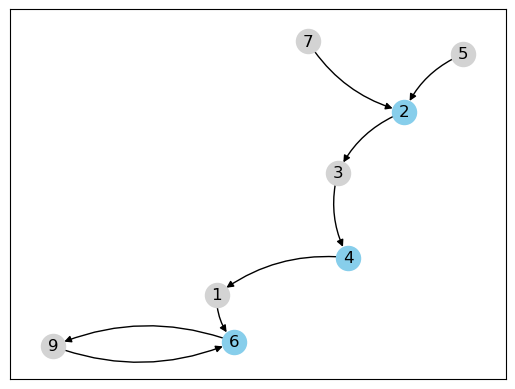


Cycle:  {9, 6}
STEP  2


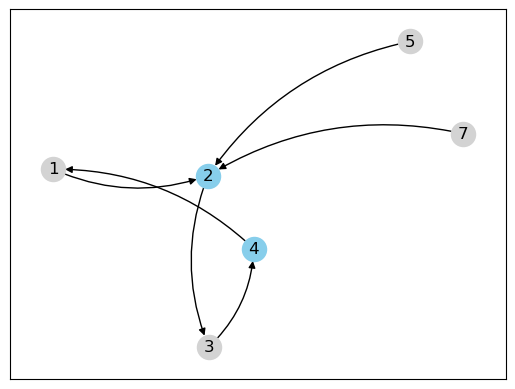


Cycle:  {1, 2, 3, 4}
Outcome:  {6: [9], 4: [3], 2: [1]}


{6: [9], 4: [3], 2: [1]}

In [27]:
# Since we already created the preferences and priorities we are ready to run the algorithm
print('Individual Preferences: ', pref)
print()
print('Priorities: ', priority)
print()

ttc(pref,priority)